# Практическое применение линейной регрессии

Для начала давайте вспомним, что из себя представляет Линейная регрессия.

**Определение**

Задача регрессии (прогнозирования) – построение модели, способной предсказывать численную величину (целевую переменную) на основе набора признаков объекта.

Математически задачу регрессии можно сформулировать следующим образом: $y = f(x_1, x_2, \dots, x_n)$, где:
- $y \in \mathbb{R}$ — целевая переменная, значение которую необходимо предсказать
- $x_1, x_2, \dots, x_n$ — признаки, по которым делается предсказание (входные данные)
- $f(x_1, x_2, \dots, x_n)$ — функция, описывающая зависимость между признаками и целевой переменной (модель)

Целью задачи регрессии является нахождение функции $f$, которая будет наилучшим образом приближать зависимость между признаками и целевой переменной.

Центральным понятием машинного обучения является обучающая выборк. Это примеры, на основе которых планируется строить общую закономерность. Она состоит из $m$ пар объектов $x_{i}$ и известных ответов $y_{i}$: $(x_{i}, y_{i})^m_{i=1}$.

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, позволяющая делать предсказания, называется алгоритмом или моделью и обозначается $f(x)$. Она принимает на вход объект и выдает ответ.

Самый простой способ рассчитать регрессию, предположить, что есть некая линейная зависимость целевой переменной от признаков. Математически линейная регрессия представляется как (это и есть базовая модель линейной регрессии):

$f_{w,b}(x) = w_1*x_1 + w_2*x_2 + \dots + w_n*x_n + b$, где

- $x_i$ - один из признаков
- $w_i$ - коэффициент уравнения, отражающий важность - $i$-го признака или с геометрической точки зрения определяющие наклон прямой
- $b$ - свободный член (пересечение с осью $y$)
- $n$ - количество признаков

Чтобы сделать модель однородной и упростить оптимизацию иногда вводится фиктивный признак $x_{0}$ всегда равный единице. Таким образом:

$$f_{w} (x) = \left \langle w,x \right \rangle = \sum^{n}_{i=0}w_{i}x_{i} $$

Проще говоря в линейной регрессии - результатом работы алгоритма, т.е. моделью, является некоторая прямая, плоскость или гиперплоскость, которая аппроксимирует наши данные. И по сути, задача линейной регрессии заключается в нахождении оптимальных коэффициентов $w_1, w_2, \dots, w_n, b$​, которые минимизируют ошибку на обучающем наборе данных и наилучшим образом описывают наши данные.

In [9]:
# Импортируем необходимые библиотеки:

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

Ссылка на данные: https://drive.google.com/file/d/1wSE2AXsggLOBVq4QTT-u0ecFjKD5B2gl/view

In [13]:
df = pd.read_csv("salary_data.csv")

df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
df.shape

(30, 2)

In [14]:
# выделим вектор признаков
X = df.iloc[:,:-1].values
# вектор целевой переменной
Y = df.iloc[:,1].values

Y # Y - одномерный вектор

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

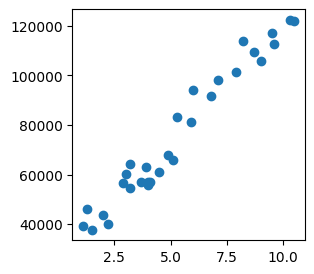

In [15]:
# Визуализируем данные:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(X, Y)
plt.show()

## Подготовка данных для обучения. Создание обучающей и валидационной выборок

Подготовка данных для обучения — один из ключевых этапов машинного обучения. Грамотное разделение данных на обучающую и валидационную выборки позволяет оценить производительность модели и избежать переобучения. В этом уроке вы рассмотрите основные концепции, подходы и методы.

Почему важно разделение исходных данных? При обучении модели важно, чтобы она не только хорошо работала на тех данных, на которых обучалась, но и могла обобщать результаты на новые, ранее не знакомые ей данные.

**Цели разделения:**

1. Обучение модели — научить модель находить закономерности на основе обучающей выборки.
2. Оценка модели — проверить, насколько хорошо модель работает на данных, которые она не видела (валидационной выборке).
3. Настройка гиперпараметров — использовать валидационные данные для выбора оптимальных параметров модели.


- **Обучающая выборка (Training Set)** — используется для настройки модели. На её основе алгоритм находит закономерности и обучает параметры модели.
Валидационная выборка (Validation Set) — используется для проверки производительности модели на данных, которые она не видела. Помогает настроить гиперпараметры и выявить переобучение.
- **Тестовая выборка (Test Set)** — применяется для финальной оценки модели после завершения её обучения и настройки.

Но в некоторых случаях действительно достаточно разделения данных только на тренировочную (train) и тестовую (test) выборки. Однако это зависит от задачи, доступного объёма данных и сложности модели. Так как вы в рамках курса проходите только классический ML, будем использовать простое разделение исходного датасета на две подвыборки — train и test.

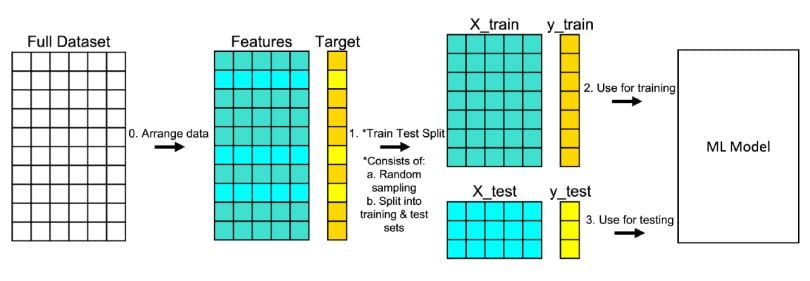

В каком же соотношении разделять данные?

**Рекомендуемые пропорции разделения зависят от объёма данных:**

- Большие данные (более 100 тысяч записей): 70–80% на обучение, 10–15% на валидацию, 10–15% на тестирование.
- Средние данные (от 10 до 100 тысяч записей): 60% на обучение, 20% на валидацию, 20% на тестирование.
- Малые данные (менее 10 тысяч записей): 70% на обучение, 30% на валидацию/тестирование.

Таким образом, разделение данных на обучающую и тестовую выборки позволяет имитировать работу модели на новых или неизвестных данных.

К тому же, при использовании одних и тех же данных может возникнуть переобучение.

**Переобучение** — это термин, используемый для описания того, когда модель изучила эту взаимосвязь «слишком хорошо» для обучающих данных.

Под «слишком хорошо» мы подразумеваем скорее то, что она слишком близко изучила взаимосвязь, то есть видит больше тенденций/корреляций/связей, чем существует на самом деле.

__________________________________________
Стоит заметить, что разделение на подвыборки необходимо только для процесса наиболее оптимального варианта обработки данных, подбора алгоритма ML и дальнейшего обучения. После выбора оптимальной стратегии алгоритм заново обучают на всем наборе данных и отправляют в продакшн.

Также, следует отметить, что все алгоритмы — будь то алгоритмы ML или алгоритмы предобработки данных — обучаются (`fit()`) на тренировочной подвыборке. На тестовой подвыборке мы лишь применяем (`predict()/transform()`) обученные алгоритмы, то есть модели.
__________________________________________


Существует две основных стратегий разделения данных на подвыборки для обучения и оценки моделей:
1. Отложенная выборка (hold-out).
2. Кроссвалидация (cross-validation).

Рассмотрим отдельно каждую из них.


### Отложенная выборка

Данный подход эффективен при большом количестве данных; при маленьких размерах выборки может возникнуть множество различных проблем.

В библиотеке `sklearn` реализован метод, позволяющий осуществить данное разбиение:

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (21, 1), (21,)
Test dataset size: (9, 1), (9,)


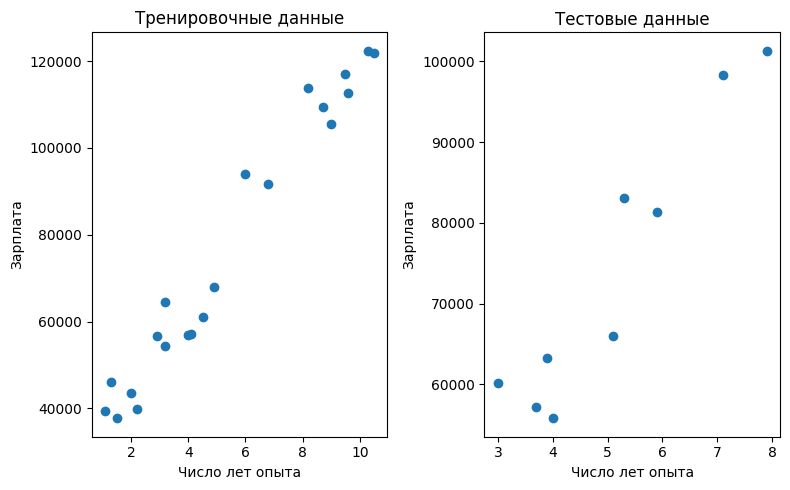

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

axes[0].scatter(X_train, y_train)
axes[1].scatter(X_test, y_test)

axes[0].set_title('Тренировочные данные')
axes[0].set_xlabel('Число лет опыта')
axes[0].set_ylabel('Зарплата')

axes[1].set_title('Тестовые данные')
axes[1].set_xlabel('Число лет опыта')
axes[1].set_ylabel('Зарплата')

fig.set_size_inches(8, 5)
plt.tight_layout()

plt.show()

## Обучение и тестирование алгоритма ML

Напомним, что одной из ключевых особенностей библиотеки `Scikit-learn` является унифицированный подход к реализации алгоритмов. Большинство алгоритмов машинного обучения и методов предобработки данных в этой библиотеке реализованы в виде классов, что делает их использование интуитивно понятным и последовательным:

1. Создание объекта класса (то есть инициализация алгоритма).
2. Обучение (`fit()`).
3. Применение (`predict()` для алгоритмов ML, `transform()` для алгоритмов предобработки данных.

In [17]:
from sklearn.linear_model import LinearRegression

# Создаем модель линейной регрессии - т.е. прямой которая будет проходить через наши точки
# Эта операция создаёт переменную model в качестве экземпляра LinearRegression
model = LinearRegression()

# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д,
# используя существующие вход и выход (x и y) в качестве аргументов.
model.fit(X_train, y_train)

LinearRegression()

In [20]:
w0 = model.intercept_
w0

26139.83905027453

In [21]:
w1 = model.coef_
w1

array([9381.03418453])

В результате получили следующую модель в виде функции:

$$
f(x) = y_{pred} = w_0 + w_1*x_1
$$

Подставим:

$$
f(x) = y_{pred} = Salary = 26139.84 + 9381.03*YearsExperience
$$

## Предсказание, оценка и визуализация результата

**Оценка моделей регрессии**

Оценка моделей регрессии — это важный этап в процессе разработки моделей машинного обучения, который позволяет понять, насколько хорошо модель аппроксимирует реальные данные. В отличие от задач классификации, где целью является предсказание категорий, в задачах регрессии мы предсказываем непрерывные значения. Оценка качества модели регрессии помогает нам измерить её точность, стабильность и способность обобщать на новые данные.

Для оценки качества модели регрессии существует несколько метрик, каждая из которых измеряет определенный аспект работы модели. Рассмотрим основные из них, с частью из них мы с вами уже знакомы:

**Среднеквадратичная ошибка (Mean Squared Error, MSE)**

Среднеквадратичная ошибка (MSE) — это одна из самых распространённых метрик для оценки моделей регрессии. Она измеряет среднее квадратичное отклонение предсказанных значений от истинных. Формула для $MSE$:

$$MSE=\frac{1}{m} \sum^{m}_{i=0} (y_i - \hat y_i)^2$$
где:
- $m$ — количество наблюдений в выборке,
- $y_i$ — истинные значения,
- $\hat y_i$​ — предсказанные значения.

$MSE$ чувствительна к выбросам, так как квадрат отклонений увеличивает влияние больших ошибок. Зато, как мы обсуждали ранее, она дифференцируема на всех пространстве значений.

**Средняя абсолютная ошибка (Mean Absolute Error, MAE)**

Средняя абсолютная ошибка (MAE) измеряет среднее абсолютное отклонение между предсказанными и реальными значениями. Это ещё одна важная метрика для оценки точности регрессионных моделей, особенно если важно минимизировать эффект выбросов. Формула для $MAE$:

$$MAE=\frac{1}{m} \sum^{m}_{i=0} |y_i - \hat y_i|$$

$MAE$ проще в интерпретации, так как она измеряет ошибку в тех же единицах, что и исходные данные, и не зависит от квадрата ошибок, как MSE, т.е. менее чувствительна к выбросам в данных.

Как нетрудно догадаться, в лучшем случае $MSE=0$ и $MAE=0$, в худшем могут достигать сколь угодно больших значений.

**Коэффициент детерминации**

Коэффициент детерминации, или $R^2$, измеряет долю дисперсии целевой переменной, которую модель объясняет. Этот коэффициент варьируется от - бесконечности до $1$. Значение $R^2$ близкое к $1$ говорит о том, что модель хорошо объясняет данные, а значение близкое к $0$ указывает на то, что модель плохо объясняет данные.
Формула для $R^2$:
$$R^2=1 - \frac{\sum^{m}_{i=1} (y_i - \hat y_i)^2}{\sum^{m}_{i=0} (y_i - \overline y_i)^2}$$
где:
- $ \hat y_i $ — предсказанное значение,
- $y_i$ — истинное значение,
- $\overline y_i $​ — среднее значение целевой переменной.

Коэффициент $R^2$ говорит о том, сколько процентов изменчивости в данных объясняется моделью. Например, если $R^2=0.85$, это означает, что 85% изменчивости целевой переменной объясняется моделью.

Однако, стоит заметить, что $R^2$ может принимать и отрицательные значения. Как вы думаете, что это может значить?


Если коэффициент детерминации $R^2$ принимает отрицательные значения, это указывает на то, что модель регрессии работает хуже, чем тривиальная модель, которая просто предсказывает среднее значение целевой переменной для всех наблюдений.

Вы также можете убедиться, что $R^2=0$ в случае когда вы всегда предсказываете среднее значение.

*Если $R2<0$, то выходит, что  Это значит, что разработанная вами модель даёт прогноз даже хуже, чем простое усреднение.*

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4419.707820134946
Mean Squared Error: 28578039.498012424
R2 score: 0.8953204092341515


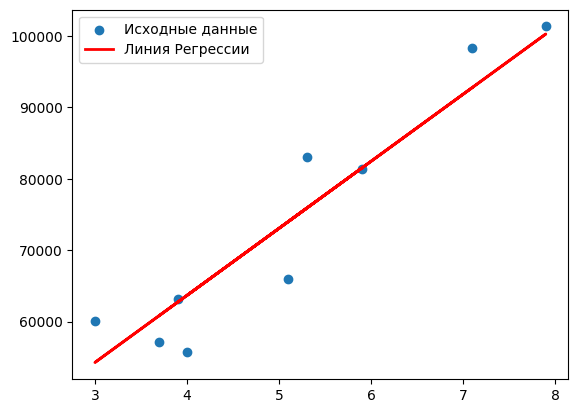

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, label='Исходные данные')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Линия Регрессии')

plt.legend()
plt.show()

In [25]:
# покажем как работает простое усреднение

# X_train, X_test, y_train, y_test
val = y_test.mean()
y_pred = np.full(y_test.shape, val)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 15076.79012345679
Mean Squared Error: 273004883.65432096
R2 score: 0.0


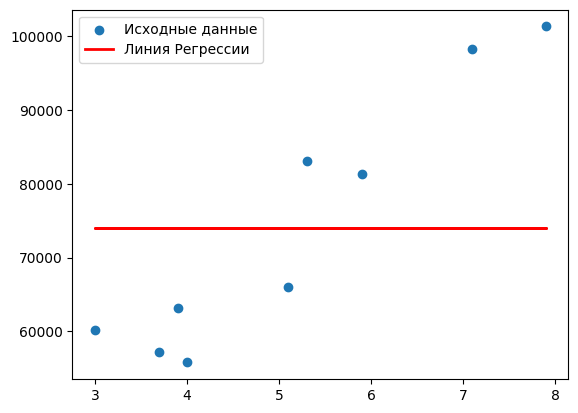

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, label='Исходные данные')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Линия Регрессии')

plt.legend()
plt.show()

## Кросс-валидация

Используется для обучения и оценки модели машинного обучения с использованием нескольких частей набора данных. Это означает, что вместо того, чтобы разбивать набор данных только на две части, одну для обучения и другую для тестирования, набор данных делится на большее количество подвыборок.

Существует несколько типов кросс-валидации, среди которых:

- K-блочная кросс-валидация (K-fold cross-validation) — здесь датасет делится на K равных частей (блоков), один из блоков используется для валидации, остальные – для обучения. Процесс повторяется K раз, каждый раз — с новым блоком для валидации.
- Стратифицированная K-блочная кросс-валидация (Stratified K-fold cross-validation) — аналогично K-блочной кросс-валидации, но с учетом пропорции классов в каждом блоке. Используется в случае несбалансированных данных.
- Оставить-P-выборок (Leave-P-Out cross-validation) — здесь на каждой итерации из датасета удаляется P объектов для валидации, остальные используются для обучения. Процесс повторяется для всех возможных комбинаций выборок размера P.

Рассмотрим самый простой способ кросс-валидации — K-fold cross-validation.

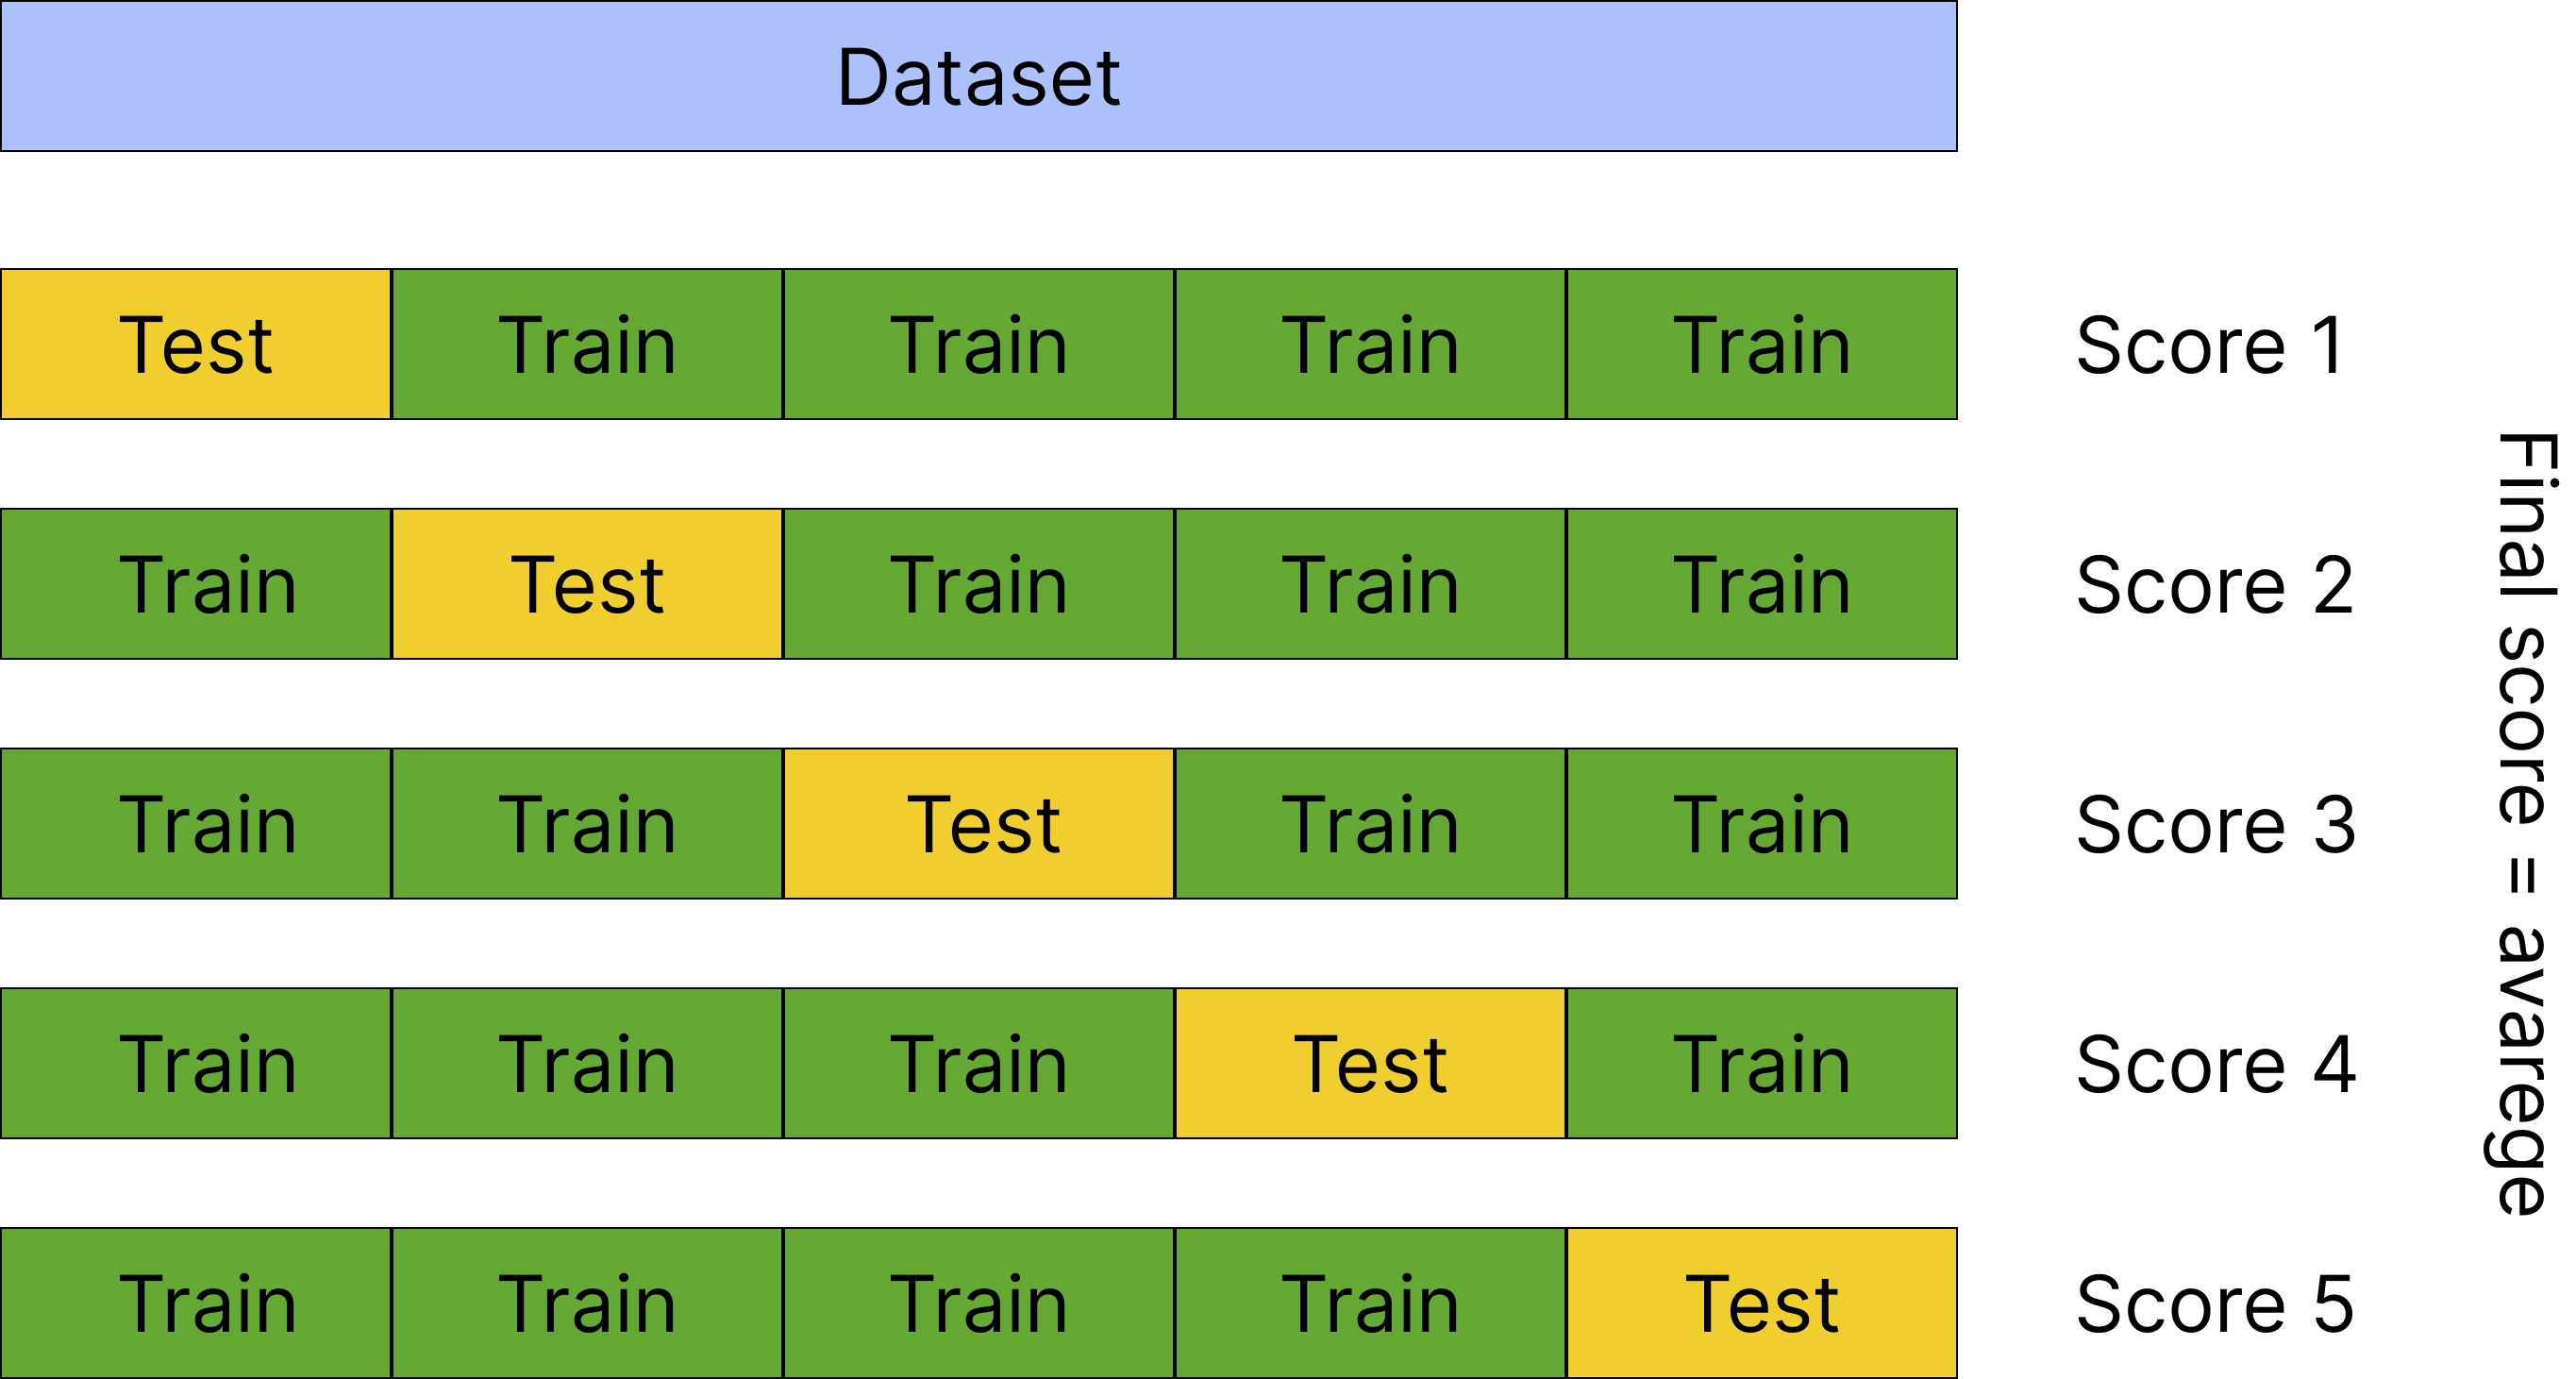

Выборка разбивается на k непересекающихся подмножеств, и каждое из них по очереди выступает в качестве контрольной выборки (а остальные $k−1$ частей — в качестве обучающей выборки). В качестве результата выдается средняя метрика по всем контрольным выборкам.

Значение $k$ должно быть тщательно выбрано для выборки данных. Плохо выбранное значение для $k$ может привести к неправильному представлению о качестве модели — например, к оценке с высокой дисперсией (которая может сильно измениться на основе данных, используемых в соответствии с моделью) или к высокой предвзятости (например, переоценка качества модели).

$k$ выбирают обычно 5 или 10, но нет формального правила. По мере того, как k становится больше, разница в размере между тестовой выборкой и подмножествами resampling становится мала. По мере уменьшения этой разницы предвзятость к технике становится меньше.


In [27]:
# В библиотеки sklearn также реализован метод кросс валидации:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Конструктор выглядит следующим образом:

`sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)`


где:
- $estimator$ — алгоритм машинного обучения,
- $X$ — вектор признаков,
- $y$ — вектор целевой переменной,
- $scoring$ — оценка модели,
- $cv$ — количество фолдов (подвыборок).

Пример разделения исходных данных на фолды (folds):


In [28]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [30]:
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X, Y, cv=kf, scoring='r2')
print(scores)

[0.90244618 0.96846325 0.91621488 0.98161851 0.84333552]


Как интерпретировать результат:
- Чем более похожи оценки между собой, тем стабильнее и лучше работает модель.
- Если вы видите, что по какому-то из разбиений получилась метрика, сильно отличающаяся от остальных, это говорит о том, что есть некоторые закономерности/особенности в данных, которые модель плохо распознает. В этом случае надо вернуться на несколько шагов назад и попробовать другие способы предобработки данных/параметры алгоритма ML или другой алгоритм в принципе.


In [32]:
# Итоговое значение модели:

mean_score = np.mean(scores)
mean_score

0.9224156654035129

## Пример того, почему регрессия "Линейная"

In [33]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape((-1, 1))
y = np.array([16, 9, 4, 1, 0, 1, 4, 9, 16])

In [34]:
model1 = LinearRegression()
model1.fit(x, y)
y_pred = model1.predict(x)

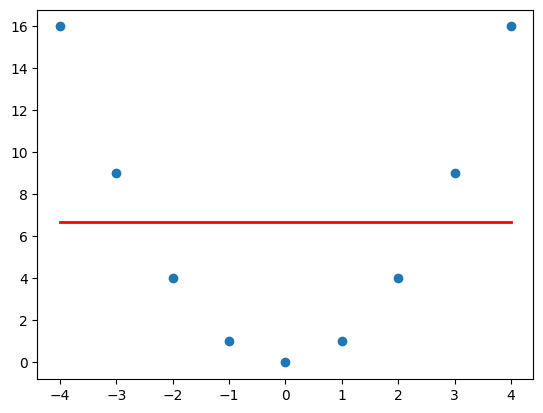

In [35]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()